Goals:
* Merge several Datasets
* Clean the Data
* Analysis the Data to find the most important metrics that contribute to higher points
* Apply ML Algorithms
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# url = 'https://www.playerprofiler.com/api/v1/players'
# headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36'}
# jsonData = requests.get(url, headers=headers).json()
# players = jsonData['data']['Players']

# rows = []
# for player in players:
#     row = {}
#     print ('Aquired: %s' %player['Full Name'])
#     url = 'https://www.playerprofiler.com/wp-admin/admin-ajax.php'
#     payload = {
#     'action': 'playerprofiler_api',
#     'endpoint': '/player/%s' %player['Player_ID']}
#     season = '2015'    
#     try:
#         jsonData = requests.get(url, headers=headers, params=payload).json()
#         if 'Performance Metrics' in jsonData['data']['Player'].keys():
#             if season in jsonData['data']['Player']['Performance Metrics'].keys():
#                 data = jsonData['data']['Player']['Performance Metrics'][season]
#             else:
#                 continue
#         else:
#             continue
#         for each in [data, player]:
#             row.update(each)
#         rows.append(row)
#     except requests.exceptions.ConnectionError:
#         print('connection error')
# df = pd.DataFrame(rows)

In [3]:
df_2019 = pd.read_csv('NFL_2019.csv',na_values='-')
df_2018 = pd.read_csv('NFL_2018.csv',na_values='-')
df_2020 = pd.read_csv('NFL_2020.csv',na_values='-')
df_2017 = pd.read_csv('NFL_2017.csv',na_values='-')
# df_2016 = pd.read_csv('NFL_2016.csv')
# df_2015 = pd.read_csv('NFL_2015.csv')

In [4]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_seq_items', None) 
pd.set_option('display.max_rows', None) 

In [5]:
rb_2019 = df_2019[df_2019['Position']== 'RB']
rb_2020 = df_2020[df_2020['Position']== 'RB']
rb_2018 = df_2018[df_2018['Position']== 'RB']
rb_2017 = df_2017[df_2017['Position']== 'RB']
# rb_2016 = df_2016[df_2016['Position']== 'RB']
# rb_2015 = df_2015[df_2015['Position']== 'RB']

## Data Cleaning

Lets begin with checking how many null there are.

In [6]:
total = rb_2018.isnull().sum().sort_values(ascending =False)
percent = rb_2018.isnull().sum()/rb_2018.isnull().count().sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis= 1,keys = ['Total','Percent'])
missing_data.head(15)

,Total,Percent
Run Stuffs Rank,162,1.0
Accuracy Rating,162,1.0
Routes Defended Per Game,162,1.0
Routes Defended Rank,162,1.0
Routes Defended,162,1.0
Fantasy Points Allowed Per Target Rank,162,1.0
Fantasy Points Allowed Per Target,162,1.0
Yards Per Target Allowed Rank,162,1.0
Yards Per Target Allowed,162,1.0
Average Cushion Rank,162,1.0


Lets trim down the data. I will get rid of the columns that have 20% or less null values.

In [7]:
rb_2019 = rb_2019.dropna(thresh = len(rb_2019)*.8,axis = 1)
rb_2020 = rb_2020.dropna(thresh = len(rb_2020)*.8,axis = 1)
rb_2018 = rb_2018.dropna(thresh = len(rb_2018)*.8,axis = 1)
rb_2017 = rb_2017.dropna(thresh = len(rb_2017)*.8,axis = 1)
# rb_2016 = rb_2016.dropna(thresh = len(rb_2016)*.5,axis = 1)
# rb_2015 = rb_2015.dropna(thresh = len(rb_2015)*.5,axis = 1)

I then delete columns that have have no use.

In [8]:
# delete rank columns
def remove_rank(x):
    r_col = [col for col in x.columns if 'Rank' in col]
    x = x.drop(r_col,axis = 1,inplace = True)
    return x
remove_rank(rb_2020)
remove_rank(rb_2019)
remove_rank(rb_2018)
remove_rank(rb_2017)
# remove_rank(rb_2016)
# remove_rank(rb_2015)

In [9]:
rb_2019.shape

(158, 120)

I rename some columns to match the other datasets for when I merge them.

In [10]:
# rb_2015.rename(columns= {'Games Played':'Games'},inplace = True)
rb_2017.rename(columns = {'Average Men In The Box': 'Average Defenders In The Box',
                         'Light Front YPC': 'Light Front Yards Per Carry','Base Front YPC':
                         'Base Front Yards Per Carry', 'Stacked Front YPC': 'Stacked Front Yards Per Carry',
                         'Yards Created Per Carry': 'Yards Created Per Touch'},inplace = True)
rb_2020.rename(columns = {'Routes Run': 'Pass Routes','Routes Run Per Game':'Pass Routes Per Game'},inplace = True)


I merge the datasets.

In [11]:
full_data = pd.concat([rb_2019,rb_2020],ignore_index = True)
full_data = pd.concat([full_data,rb_2018],ignore_index = True)
full_data = pd.concat([full_data,rb_2017],ignore_index = True)
# full_data = pd.concat([full_data,rb_2016],ignore_index = True)
# full_data = pd.concat([full_data,rb_2015],ignore_index = True)
full_data.head()

,Season,Games,Big Hits,Big Hits Per Game,Carries,Carries Inside 10,Carries Inside 10 Per Game,Carries Inside 5,Carries Per Game,Catchable Targets,Catchable Target Rate,Catch Rate,Dominator Rating,Drops,Drops Per Game,Drop Rate,Expected Fantasy Points,Expected Fantasy Points Per Game,Expected Touchdowns,Expected Touchdown Differential,Fantasy Points,Fantasy Points Per Game,Fantasy Points Per Game Differential,Fantasy Points Per Snap,Game Script,Normalized Fantasy Points Per Game,Pace of Play,Production Premium,QB Rating When Targeted,Receiving TDs,Receiving Yards,Receiving Yards Per Game,Receptions,Receptions Per Game,Red Zone Carries,Red Zone Carries Per Game,Red Zone Receptions,Red Zone Targets,Red Zone Target Share,Red Zone Touches,Red Zone Touches Per Game,Route Participation,Pass Routes,Pass Routes Per Game,Pass Snaps,Run Snaps,Red Zone Snaps,Red Zone Snap Share,Rushing Touchdowns,Rushing Yards,Rush Yards Per Game,Slot Rate,Slot Snaps,Snaps,Snap Share,Targets,Target Share,Targets Inside 10,Targets Inside 10 Per Game,Targets Inside 5,Targets Inside 5 Per Game,Targets Per Game,Total Touchdowns,Total Touches,Total Yards,Total Yards Per Game,Touchdown Rate,Weekly Volatility,Yards After Catch,Yards After Catch Per Game,Yards After Catch Per Reception,Yards After Catch Per Target,Yards Per Reception,Yards Per Target,VOS,Player_ID,Full Name,Avatar,Permalink,Position,FullName,Average Defenders In The Box,Base Front Carry Rate,Base Front Yards Per Carry,Breakaway Run Rate,Breakaway Runs,Breakaway Runs Per Game,CarriesInside 5 Per Game,Endzone Targets,Endzone Target Share,Evaded Tackles,Evaded Tackles Per Game,Fantasy Points Per Opportunity,Goal Line Carries,Goal Line Carries Per Game,Juke Rate,Light Front Carry Rate,Light Front Yards Per Carry,Opportunities,Opportunity Share,Red Zone Opportunities,Shotgun Carry Rate,Shotgun Yards Per Carry,Stacked Front Carry Rate,Snap-weighted Game Script,Stuffed Runs,Stuffed Run Rate,Team Run Plays,True Yards Per Carry,Under Center Carry Rate,Under Center Yards Per Carry,Weighted Opportunities,Weighted Opportunities Per Game,Yards Created,Yards Created Per Game,Yards Created Per Touch,Yards Per Carry,Yards Per Opportunity,Yards Per Route Run,Yards Per Touch,Best Ball Points Added,Best Ball Points Added Per Game,Expected Points Added (EPA),Rush EPA,Receiving EPA,EPA Per Carry,EPA Per Touch,Stacked Front Yards Per Carry,InverseFullName,Uncatchable Targets,Rushing TDs,Total Target Depth,Total Target Depth Per Game
0,2019.0,16,3.0,0.2,179.0,14.0,0.9,6.0,11.2,65.0,103.2%,79.4%,18.0%,2.0,0.12,3.2%,219.2,13.7,8.3,-2.34,216.70,13.5,-0.2,0.38,-1.85,13.3,2.22,6.9,116.2,3.0,509.0,31.8,50.0,3.1,27.0,1.7,9.0,11.0,14.3%,36.0,2.2,42.7%,262.0,16.4,364.0,209.0,76.0,46.6%,3.0,818.0,51.1,1.6%,9.0,573,53.7%,63.0,10.4%,3.0,0.2,0.0,0.0,3.9,6.0,229.0,1327.0,82.9,2.6%,8.7,405.0,25.3,8.1,6.4,10.2,8.1,3.1,MS-0125,Miles Sanders,https://www.playerprofiler.com/wp-content/uplo...,https://www.playerprofiler.com/nfl/miles-sanders/,RB,Miles Sanders,6.5,33.0%,4.3,3.4%,6.0,0.4,0.4,1.0,2.9%,75.0,4.7,0.90,6.0,0.4,32.8%,57.5%,4.9,242.0,48.4%,38.0,60.3%,5.1,9.5%,-1.85,36.0,20.2%,28.4,4.2,40.2%,3.9,206.3,12.9,345.0,21.6,1.51,4.6,5.5,1.94,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.0,14,7.0,0.5,171.0,14.0,1.0,8.0,12.2,87.0,89.7%,83.5%,20.2%,4.0,0.29,4.1%,253.4,18.1,9.7,-3.72,248.52,17.8,-0.3,0.43,3.58,17.5,2.08,9.9,88.7,1.0,533.0,38.1,81.0,5.8,27.0,1.9,9.0,13.0,18.3%,36.0,2.6,56.4%,282.0,20.1,368.0,214.0,85.0,51.5%,5.0,797.0,56.9,5.7%,33.0,582,69.2%,97.0,20.1%,7.0,0.5,0.0,0.0,6.9,6.0,252.0,1330.0,95.0,2.4%,8.4,544.0,38.9,6.7,5.6,6.6,5.5,5.6,AK-0050,Alvin Kamara,https://www.playerprofiler.com/wp-content/uplo...,https://www.playerprofiler.com/nfl/alvin-kamara/,RB,Alvin Kamara,6.6,33.9%,4.1,4.7%,8.0,0.6,0.6,0.0,0.0%,77.0,5.5,0.93,4.0,0.3,30.6%,45.0%,5.7,268.0,66.0%,40.0,24.0%,5.9,19.3%,3.58,27.0,15.8%,25.3,4.4,76.0%,4.3,254.9,18.2,317.0,22.6,1.26,4.7,5.0,1.89,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019

In [12]:
full_data.head()

,Season,Games,Big Hits,Big Hits Per Game,Carries,Carries Inside 10,Carries Inside 10 Per Game,Carries Inside 5,Carries Per Game,Catchable Targets,Catchable Target Rate,Catch Rate,Dominator Rating,Drops,Drops Per Game,Drop Rate,Expected Fantasy Points,Expected Fantasy Points Per Game,Expected Touchdowns,Expected Touchdown Differential,Fantasy Points,Fantasy Points Per Game,Fantasy Points Per Game Differential,Fantasy Points Per Snap,Game Script,Normalized Fantasy Points Per Game,Pace of Play,Production Premium,QB Rating When Targeted,Receiving TDs,Receiving Yards,Receiving Yards Per Game,Receptions,Receptions Per Game,Red Zone Carries,Red Zone Carries Per Game,Red Zone Receptions,Red Zone Targets,Red Zone Target Share,Red Zone Touches,Red Zone Touches Per Game,Route Participation,Pass Routes,Pass Routes Per Game,Pass Snaps,Run Snaps,Red Zone Snaps,Red Zone Snap Share,Rushing Touchdowns,Rushing Yards,Rush Yards Per Game,Slot Rate,Slot Snaps,Snaps,Snap Share,Targets,Target Share,Targets Inside 10,Targets Inside 10 Per Game,Targets Inside 5,Targets Inside 5 Per Game,Targets Per Game,Total Touchdowns,Total Touches,Total Yards,Total Yards Per Game,Touchdown Rate,Weekly Volatility,Yards After Catch,Yards After Catch Per Game,Yards After Catch Per Reception,Yards After Catch Per Target,Yards Per Reception,Yards Per Target,VOS,Player_ID,Full Name,Avatar,Permalink,Position,FullName,Average Defenders In The Box,Base Front Carry Rate,Base Front Yards Per Carry,Breakaway Run Rate,Breakaway Runs,Breakaway Runs Per Game,CarriesInside 5 Per Game,Endzone Targets,Endzone Target Share,Evaded Tackles,Evaded Tackles Per Game,Fantasy Points Per Opportunity,Goal Line Carries,Goal Line Carries Per Game,Juke Rate,Light Front Carry Rate,Light Front Yards Per Carry,Opportunities,Opportunity Share,Red Zone Opportunities,Shotgun Carry Rate,Shotgun Yards Per Carry,Stacked Front Carry Rate,Snap-weighted Game Script,Stuffed Runs,Stuffed Run Rate,Team Run Plays,True Yards Per Carry,Under Center Carry Rate,Under Center Yards Per Carry,Weighted Opportunities,Weighted Opportunities Per Game,Yards Created,Yards Created Per Game,Yards Created Per Touch,Yards Per Carry,Yards Per Opportunity,Yards Per Route Run,Yards Per Touch,Best Ball Points Added,Best Ball Points Added Per Game,Expected Points Added (EPA),Rush EPA,Receiving EPA,EPA Per Carry,EPA Per Touch,Stacked Front Yards Per Carry,InverseFullName,Uncatchable Targets,Rushing TDs,Total Target Depth,Total Target Depth Per Game
0,2019.0,16,3.0,0.2,179.0,14.0,0.9,6.0,11.2,65.0,103.2%,79.4%,18.0%,2.0,0.12,3.2%,219.2,13.7,8.3,-2.34,216.70,13.5,-0.2,0.38,-1.85,13.3,2.22,6.9,116.2,3.0,509.0,31.8,50.0,3.1,27.0,1.7,9.0,11.0,14.3%,36.0,2.2,42.7%,262.0,16.4,364.0,209.0,76.0,46.6%,3.0,818.0,51.1,1.6%,9.0,573,53.7%,63.0,10.4%,3.0,0.2,0.0,0.0,3.9,6.0,229.0,1327.0,82.9,2.6%,8.7,405.0,25.3,8.1,6.4,10.2,8.1,3.1,MS-0125,Miles Sanders,https://www.playerprofiler.com/wp-content/uplo...,https://www.playerprofiler.com/nfl/miles-sanders/,RB,Miles Sanders,6.5,33.0%,4.3,3.4%,6.0,0.4,0.4,1.0,2.9%,75.0,4.7,0.90,6.0,0.4,32.8%,57.5%,4.9,242.0,48.4%,38.0,60.3%,5.1,9.5%,-1.85,36.0,20.2%,28.4,4.2,40.2%,3.9,206.3,12.9,345.0,21.6,1.51,4.6,5.5,1.94,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.0,14,7.0,0.5,171.0,14.0,1.0,8.0,12.2,87.0,89.7%,83.5%,20.2%,4.0,0.29,4.1%,253.4,18.1,9.7,-3.72,248.52,17.8,-0.3,0.43,3.58,17.5,2.08,9.9,88.7,1.0,533.0,38.1,81.0,5.8,27.0,1.9,9.0,13.0,18.3%,36.0,2.6,56.4%,282.0,20.1,368.0,214.0,85.0,51.5%,5.0,797.0,56.9,5.7%,33.0,582,69.2%,97.0,20.1%,7.0,0.5,0.0,0.0,6.9,6.0,252.0,1330.0,95.0,2.4%,8.4,544.0,38.9,6.7,5.6,6.6,5.5,5.6,AK-0050,Alvin Kamara,https://www.playerprofiler.com/wp-content/uplo...,https://www.playerprofiler.com/nfl/alvin-kamara/,RB,Alvin Kamara,6.6,33.9%,4.1,4.7%,8.0,0.6,0.6,0.0,0.0%,77.0,5.5,0.93,4.0,0.3,30.6%,45.0%,5.7,268.0,66.0%,40.0,24.0%,5.9,19.3%,3.58,27.0,15.8%,25.3,4.4,76.0%,4.3,254.9,18.2,317.0,22.6,1.26,4.7,5.0,1.89,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019

In [13]:
# remove columns abbrivations that had no clear discription.
def remove_epa(x):
    r_col = [col for col in x.columns if 'EPA' in col]
    x = x.drop(r_col,axis = 1,inplace = True)
    return x
remove_epa(full_data)

Get rid of more columns with have no use. 

In [14]:
full_data.drop(['FullName','Permalink','Avatar','InverseFullName','Rushing TDs',
                'Uncatchable Targets','Total Target Depth','Total Target Depth Per Game',
               'Best Ball Points Added','Best Ball Points Added Per Game'],axis = 1, inplace = True)

In [15]:
full_data = full_data.dropna(thresh = len(full_data)*.8,axis = 1)

In [16]:
total = full_data.isnull().sum().sort_values(ascending =False)
percent = full_data.isnull().sum()/full_data.isnull().count().sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis= 1,keys = ['Total','Percent'])
missing_data

,Total,Percent
Base Front Yards Per Carry,112,0.172043
Yards After Catch Per Reception,81,0.124424
Yards Per Reception,80,0.122888
Catch Rate,66,0.101382
Catchable Target Rate,66,0.101382
Drop Rate,66,0.101382
Yards Per Target,66,0.101382
QB Rating When Targeted,66,0.101382
Stacked Front Carry Rate,65,0.099846
Average Defenders In The Box,65,0.099846


I filter out players that played less than 10 games to avoud the results form being skewed.

In [17]:
full_data = full_data[full_data['Games'] >= 10]
full_data.shape

(326, 92)

In [18]:
cols = missing_data[missing_data['Total'] > 0].index
full_data.dropna(subset=cols,inplace = True)


In [19]:
pct_col = ['Catchable Target Rate','Catch Rate','Dominator Rating','Drop Rate',
           'Red Zone Target Share','Route Participation','Slot Rate','Snap Share','Target Share',
          'Touchdown Rate','Base Front Carry Rate','Breakaway Run Rate','Endzone Target Share',
          'Juke Rate','Light Front Carry Rate','Opportunity Share','Stacked Front Carry Rate']
          


In [20]:
full_data[pct_col] = full_data[pct_col].astype(str)
for col in pct_col:
    full_data[col] = full_data[col].apply(lambda X: (X.replace('-','0')))
    full_data[col] = full_data[col].apply(lambda X: (X.replace('%','')))
    full_data[col] = full_data[col].apply(lambda X: int(float(X)))
    full_data[col] = full_data[col].apply(lambda X: (X/100))

In [21]:
pm_col = ['Game Script','VOS','Snap-weighted Game Script']
full_data.drop(pm_col,inplace = True,axis = 1)
    

In [22]:
full_data.to_csv('full_data_preproc.csv',index = False)

In [23]:
# ob = full_data.select_dtypes(include = 'object')
# full_data['Team Run Plays'] = full_data['Team Run Plays'].astype(str).astype('float64')


## EDA

In [24]:
full_data.head()

,Season,Games,Carries,Carries Inside 10,Carries Inside 10 Per Game,Carries Inside 5,Carries Per Game,Catchable Targets,Catchable Target Rate,Catch Rate,Dominator Rating,Drops,Drops Per Game,Drop Rate,Fantasy Points,Fantasy Points Per Game,Fantasy Points Per Snap,Production Premium,QB Rating When Targeted,Receiving TDs,Receiving Yards,Receiving Yards Per Game,Receptions,Receptions Per Game,Red Zone Carries,Red Zone Carries Per Game,Red Zone Receptions,Red Zone Targets,Red Zone Target Share,Red Zone Touches,Red Zone Touches Per Game,Route Participation,Pass Routes,Pass Routes Per Game,Rushing Touchdowns,Rushing Yards,Rush Yards Per Game,Slot Rate,Snaps,Snap Share,Targets,Target Share,Targets Inside 10,Targets Inside 10 Per Game,Targets Inside 5,Targets Inside 5 Per Game,Targets Per Game,Total Touchdowns,Total Touches,Total Yards,Total Yards Per Game,Touchdown Rate,Weekly Volatility,Yards After Catch,Yards After Catch Per Game,Yards After Catch Per Reception,Yards Per Reception,Yards Per Target,Player_ID,Full Name,Position,Average Defenders In The Box,Base Front Carry Rate,Base Front Yards Per Carry,Breakaway Run Rate,Breakaway Runs,Breakaway Runs Per Game,CarriesInside 5 Per Game,Endzone Targets,Endzone Target Share,Evaded Tackles,Evaded Tackles Per Game,Fantasy Points Per Opportunity,Goal Line Carries,Goal Line Carries Per Game,Juke Rate,Light Front Carry Rate,Opportunities,Opportunity Share,Red Zone Opportunities,Stacked Front Carry Rate,Team Run Plays,Yards Created,Yards Created Per Game,Yards Created Per Touch,Yards Per Carry,Yards Per Opportunity,Yards Per Route Run,Yards Per Touch
0,2019.0,16,179.0,14.0,0.9,6.0,11.2,65.0,1.03,0.79,0.18,2.0,0.12,0.03,216.70,13.5,0.38,6.9,116.2,3.0,509.0,31.8,50.0,3.1,27.0,1.7,9.0,11.0,0.14,36.0,2.2,0.42,262.0,16.4,3.0,818.0,51.1,0.01,573,0.53,63.0,0.10,3.0,0.2,0.0,0.0,3.9,6.0,229.0,1327.0,82.9,0.02,8.7,405.0,25.3,8.1,10.2,8.1,MS-0125,Miles Sanders,RB,6.5,0.33,4.3,0.03,6.0,0.4,0.4,1.0,0.02,75.0,4.7,0.90,6.0,0.4,0.32,0.57,242.0,0.48,38.0,0.09,28.4,345.0,21.6,1.51,4.6,5.5,1.94,5.8
1,2019.0,14,171.0,14.0,1.0,8.0,12.2,87.0,0.89,0.83,0.20,4.0,0.29,0.04,248.52,17.8,0.43,9.9,88.7,1.0,533.0,38.1,81.0,5.8,27.0,1.9,9.0,13.0,0.18,36.0,2.6,0.56,282.0,20.1,5.0,797.0,56.9,0.05,582,0.69,97.0,0.20,7.0,0.5,0.0,0.0,6.9,6.0,252.0,1330.0,95.0,0.02,8.4,544.0,38.9,6.7,6.6,5.5,AK-0050,Alvin Kamara,RB,6.6,0.33,4.1,0.04,8.0,0.6,0.6,0.0,0.00,77.0,5.5,0.93,4.0,0.3,0.30,0.45,268.0,0.66,40.0,0.19,25.3,317.0,22.6,1.26,4.7,5.0,1.89,5.3
2,2019.0,13,217.0,16.0,1.2,8.0,16.7,59.0,0.80,0.71,0.25,6.0,0.46,0.08,244.10,18.8,0.35,-0.4,95.5,2.0,438.0,33.7,52.0,4.0,32.0,2.5,3.0,7.0,0.11,35.0,2.7,0.47,243.0,18.7,6.0,1003.0,77.2,0.00,701,0.88,73.0,0.14,5.0,0.4,2.0,0.2,5.6,8.0,269.0,1441.0,110.8,0.03,10.6,425.0,32.7,8.2,8.4,6.0,SB-0212,Saquon Barkley,RB,6.8,0.42,4.0,0.04,9.0,0.7,0.6,1.0,0.04,68.0,5.2,0.84,5.0,0.4,0.25,0.35,290.0,0.88,39.0,0.21,22.6,501.0,38.5,1.86,4.6,5.0,1.80,5.4
3,2019.0,16,236.0,19.0,1.2,17.0,14.8,56.0,0.81,0.71,0.35,5.0,0.31,0.07,314.80,19.7,0.51,29.7,104.4,3.0,474.0,29.6,49.0,3.1,34.0,2.1,10.0,12.0,0.14,44.0,2.8,0.35,203.0,12.7,16.0,1084.0,67.8,0.02,616,0.62,69.0,0.12,4.0,0.2,2.0,0.1,4.3,19.0,285.0,1558.0,97.4,0.06,13.4,432.0,27.0,8.8,9.7,6.9,AJ-1143,Aaron Jones,RB,6.7,0.47,4.7,0.03,8.0,0.5,1.1,2.0,0.04,86.0,5.4,1.03,12.0,0.8,0.30,0.39,305.0,0.62,46.0,0.11,25.7,501.0,31.3,1.76,4.6,5.1,2.34,5.5
4,2019.0,13,242.0,21.0,1.6,12.0,18.6,24.0,0.85,0.71,0.26,3.0,0.23,0.10,191.60,14.7,0.45,-10.5,86.3,0.0,166.0,12.8,20.0,1.5,42.0,3.2,2.0,3.0,0.06,44.0,3.4,0.24,102.0,7.9,7.0,1150.0,88.5,0.00,425,0.54,28.0,0.07,2.0,0.2,0.0,0.0,2.2,7.0,262.0,1316.0,101.2,0.02,7.6,178.0,13.7,8.9,8.3,5.9,JJ-0587,Josh Jacobs,RB,6.7,0.33,4.4,0.05,13.0,1.0,0.9,0.0,0.00,81.0,6.2,0.71,9.0,0.7,0.30,0.46,270.0,0.64,45.0,0.20,27.3,463.0,35.6,1.77,4.8,4.9,1.63,5.0


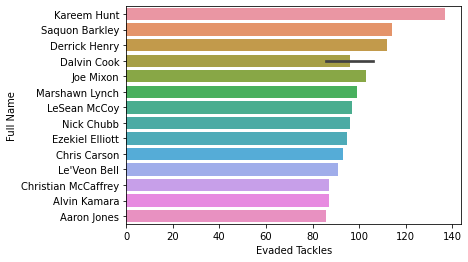

In [25]:
names = full_data.nlargest(15,'Evaded Tackles')['Full Name']
values = full_data.nlargest(15,'Evaded Tackles')['Evaded Tackles']
# td = full_data['Red Zone Targets'].sort_values(ascending = False)[:15]
sns.barplot(values,names)


Text(0.5, 0, 'Dominator Rating')

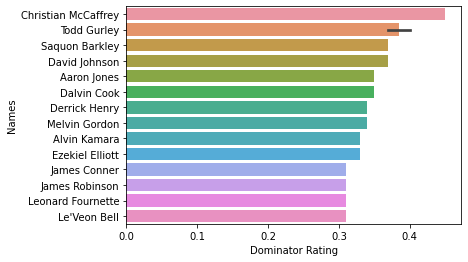

In [26]:
names = full_data.nlargest(15, 'Dominator Rating',keep = 'all')['Full Name'].values
values = full_data.nlargest(15, 'Dominator Rating',keep = 'all')['Dominator Rating'].values
# td = full_data['Red Zone Targets'].sort_values(ascending = False)[:15]
sns.barplot(values,names,)
plt.ylabel('Names')
plt.xlabel('Dominator Rating')




#### The target variable is Fantasy POints. I take a look at it to see the distribution.

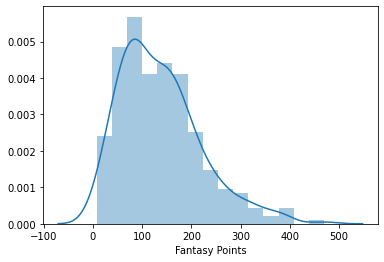

In [27]:
# check distribution of the Target Variable
sns.distplot(full_data['Fantasy Points'])

Target variable is skewed so we will apply log

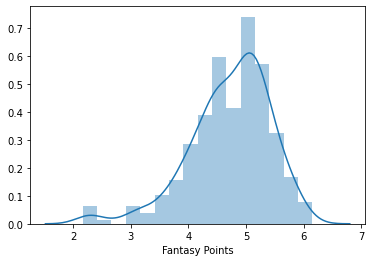

In [28]:
full_data['Fantasy Points'] = np.log1p(full_data['Fantasy Points'])
sns.distplot(full_data['Fantasy Points'])

Lets then see what the relationship between the target viable and the rest of the features look like.

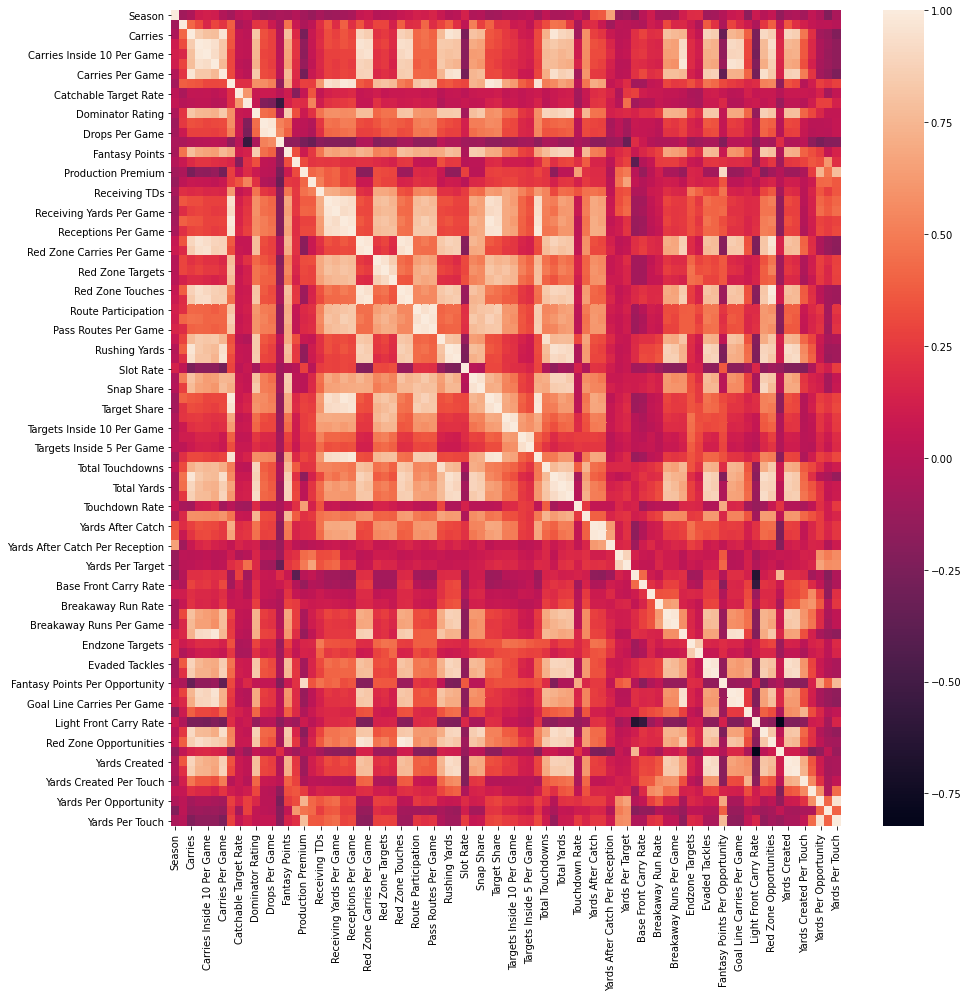

In [29]:
num_col = full_data.select_dtypes(exclude ='object')
num_col.drop(['Fantasy Points Per Game','Opportunities'],axis = 1,inplace = True)
corr = num_col.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr)

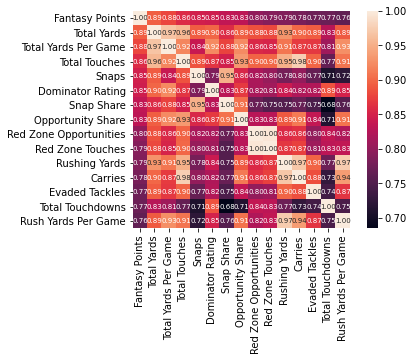

In [30]:
k = 15
cols = corr.nlargest(k,'Fantasy Points')['Fantasy Points'].index
cm = np.corrcoef(full_data[cols].values.T)
hm = sns.heatmap(cm, annot = True, cbar = True, square = True, fmt = '.2f', yticklabels = cols.values, xticklabels = cols.values, annot_kws={'size':7})

##### There appears to be multicollinearity, which is not surprising . I will remove those features that 100% correlation since the more complex algorithms we will be using are robust to multicollinearity.

####  I then look at some of the more important features and their relationship with the Target Variable

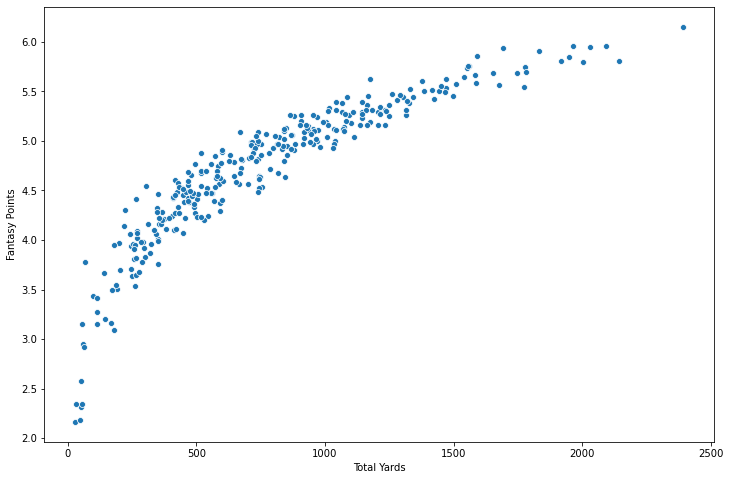

In [31]:
plt.subplots(figsize = (12,8))
sns.scatterplot(x = full_data['Total Yards'], y = full_data['Fantasy Points'])

In [32]:
#### What do you know, they look like log functions

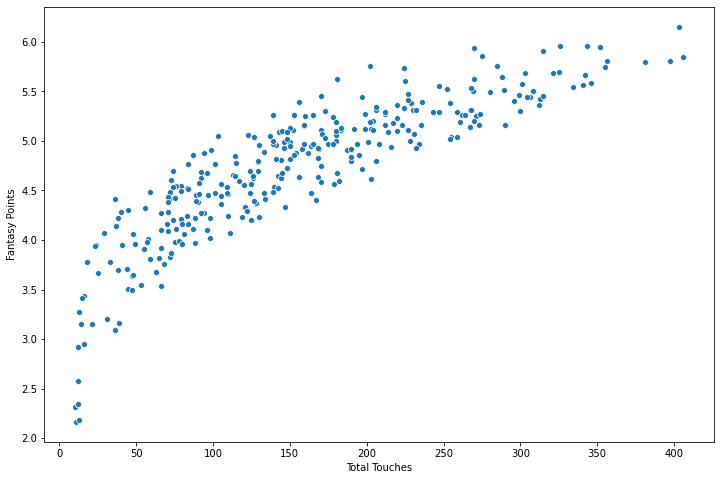

In [33]:
plt.subplots(figsize = (12,8))
sns.scatterplot(x = full_data['Total Touches'], y = full_data['Fantasy Points'])

## Machine Learning

In [34]:
train = full_data.drop(['Player_ID','Position','Season','Fantasy Points Per Game'],axis = 1)
y = train['Fantasy Points'].reset_index(drop = True)
train = train.drop(['Fantasy Points','Full Name','Opportunities'],axis =1)
names = train.columns


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
scaler = StandardScaler()
train = scaler.fit_transform(train) 

In [37]:
X_train, X_val, y_train, y_val = train_test_split(train,y,test_size =.2,random_state = 42)

In [38]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((247, 82), (62, 82), (247,), (62,))

In [39]:
def rmsle(y_val,y_pred):
    return np.sqrt(mean_squared_error(y_val,y_pred))

In [40]:
scores = {}
lreg = LinearRegression()
lreg.fit(X_train,y_train)
y_pred = lreg.predict(X_val)
score1 = rmsle(y_val,y_pred)
scores['Reg'] = score1

In [41]:
# ridge = Ridge()
# param_grid = {'alpha':[x for x in range(1, 100)]}
# ridge_reg = GridSearchCV(ridge,param_grid,scoring = 'neg_mean_squared_error',cv = 10)
# ridge_reg.fit(train,y)
# ridge_reg.best_params_,np.sqrt(-ridge_reg.best_score_)

<function matplotlib.pyplot.show(*args, **kw)>

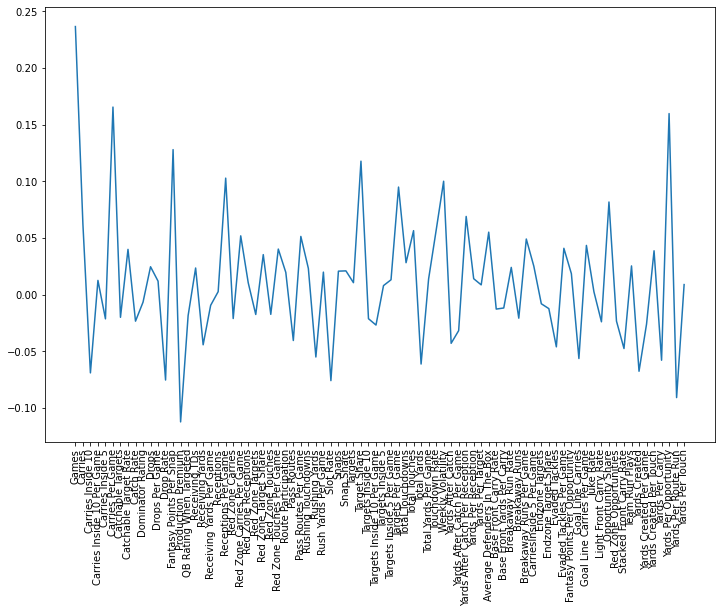

In [42]:
ridge = Ridge(alpha = 5)
rid = ridge.fit(X_train,y_train).coef_


y_pred = ridge.predict(X_val)
score2 = rmsle(y_val,y_pred)
scores['Ridge'] = score2
plt.subplots(figsize = (12,8))
_ = plt.plot(range(len(names)),rid)
_ = plt.xticks(range(len(names)),names,rotation = 90)
plt.show

In [43]:
# gbr = GradientBoostingRegressor()
# param = {'n_estimators': [5000,5500,6000],'learning_rate':[.05,.01,.009],'max_depth':[4,6],'min_samples_leaf':[13,15,17],'min_samples_split':[8,10,13]}
# gbr_reg = RandomizedSearchCV(gbr,param_distributions=param, scoring = 'neg_mean_squared_error',n_iter = 10,cv=10)
# gbr_reg.fit(X_train,y_train)
# gbr_reg.best_params_, np.sqrt(-gbr_reg.best_score_)

In [44]:
gbr = GradientBoostingRegressor(n_estimators= 6000,min_samples_split= 13,
                                min_samples_leaf= 15,max_depth= 6,learning_rate= 0.05)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_val)
score3 = rmsle(y_val,y_pred)
scores['GBR'] = score3

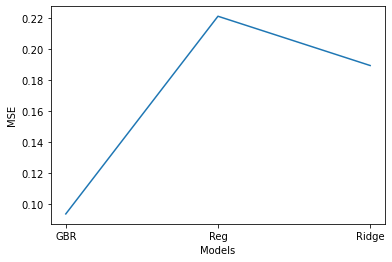

In [45]:
labels = list(scores.keys())
values = list(scores.values())
sns.lineplot(x=labels,y =values)
plt.ylabel('MSE')
plt.xlabel('Models')
plt.show()

Clearly the GBR model gives the best results(lower the MSE the better)